<a href="https://colab.research.google.com/github/juanninocruz/Estadistica/blob/main/data_prestamo_vivienda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


url = "https://raw.githubusercontent.com/juanninocruz/Estadistica/main/Valor_vivienda.txt"

columnas = [
    'ingresos', 'gasto_ppal', 'gasto_vehiculo', 'otros_gastos',
    'ahorros_en_banco', 'valor_vivienda', 'estado_civil',
    'hijos', 'trabajo', 'compro'
]

df = pd.read_csv(url, sep=",", names=columnas, header=0, encoding='utf-8')

columnas_numericas = ['ingresos', 'gasto_ppal', 'gasto_vehiculo', 'otros_gastos',
                      'ahorros_en_banco', 'valor_vivienda', 'estado_civil',
                      'hijos', 'trabajo', 'compro']


display(df.head())
df.info()
print(df.dtypes)

,ingresos,gasto_ppal,gasto_vehiculo,otros_gastos,ahorros_en_banco,valor_vivienda,estado_civil,hijos,trabajo,compro
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   ingresos          202 non-null    int64
 1   gasto_ppal        202 non-null    int64
 2   gasto_vehiculo    202 non-null    int64
 3   otros_gastos      202 non-null    int64
 4   ahorros_en_banco  202 non-null    int64
 5   valor_vivienda    202 non-null    int64
 6   estado_civil      202 non-null    int64
 7   hijos             202 non-null    int64
 8   trabajo           202 non-null    int64
 9   compro            202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB
ingresos            int64
gasto_ppal          int64
gasto_vehiculo      int64
otros_gastos        int64
ahorros_en_banco    int64
valor_vivienda      int64
estado_civil        int64
hijos               int64
trabajo             int64
compro              int64
dtype: object


In [ ]:
# Determinación de nuevas variables clave
df["total_gastos"] = df["gasto_ppal"] + df["gasto_vehiculo"] + df["otros_gastos"]
df["credito_a_solicitar"] = df["valor_vivienda"] - (df["ahorros_en_banco"] + df["total_gastos"])

columnas_redundantes = ['gasto_ppal', 'gasto_vehiculo', 'otros_gastos']
df_simplificado = df.drop(columns=columnas_redundantes)

display(df_simplificado.head())

# Verificación de la transformación realizada correctamente
print("\n Columnas actuales del DataFrame simplificado:\n")
print(df_simplificado.columns.tolist())

print("\n Información general del DataFrame:\n")
df_simplificado.info()

,ingresos,ahorros_en_banco,valor_vivienda,estado_civil,hijos,trabajo,compro,total_gastos,credito_a_solicitar
0,6000,50000,400000,0,2,2,1,1600,348400
1,6745,43240,636897,1,3,6,0,1496,592161
2,6455,57463,321779,2,1,8,1,1926,262390
3,7098,54506,660933,0,0,3,0,1547,604880
4,6167,41512,348932,0,0,3,1,1606,305814



 Columnas actuales del DataFrame simplificado:

['ingresos', 'ahorros_en_banco', 'valor_vivienda', 'estado_civil', 'hijos', 'trabajo', 'compro', 'total_gastos', 'credito_a_solicitar']

 Información general del DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ingresos             202 non-null    int64
 1   ahorros_en_banco     202 non-null    int64
 2   valor_vivienda       202 non-null    int64
 3   estado_civil         202 non-null    int64
 4   hijos                202 non-null    int64
 5   trabajo              202 non-null    int64
 6   compro               202 non-null    int64
 7   total_gastos         202 non-null    int64
 8   credito_a_solicitar  202 non-null    int64
dtypes: int64(9)
memory usage: 14.3 KB


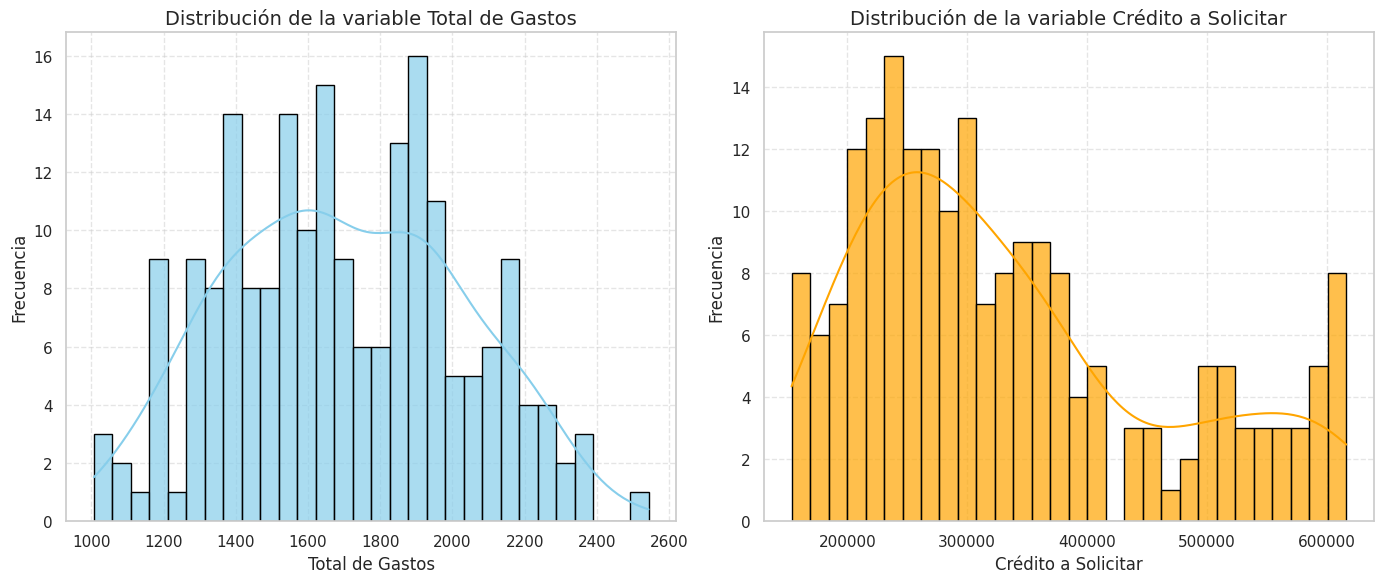


 Estadísticas descriptivas de las nuevas variables:

       total_gastos  credito_a_solicitar
count    202.000000           202.000000
mean    1698.752475        332901.217822
std      324.838005        126573.127920
min     1007.000000        153322.000000
25%     1430.500000        238491.250000
50%     1669.500000        299567.500000
75%     1928.000000        391880.750000
max     2543.000000        616458.000000


In [ ]:
#  análisis exploratorio de datos (EDA) de las nuevas variables

sns.set(style="whitegrid", palette="muted")

# Figura con dos histogramas (lado a lado)
plt.figure(figsize=(14, 6))

# Histograma con densidad para total_gastos
plt.subplot(1, 2, 1)
sns.histplot(df["total_gastos"], bins=30, kde=True, color="skyblue", edgecolor="black", alpha=0.7)
plt.title("Distribución de la variable Total de Gastos", fontsize=14)
plt.xlabel("Total de Gastos")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle="--", alpha=0.5)

# Histograma con densidad para credito_a_solicitar
plt.subplot(1, 2, 2)
sns.histplot(df["credito_a_solicitar"], bins=30, kde=True, color="orange", edgecolor="black", alpha=0.7)
plt.title("Distribución de la variable Crédito a Solicitar", fontsize=14)
plt.xlabel("Crédito a Solicitar")
plt.ylabel("Frecuencia")
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()


print("\n Estadísticas descriptivas de las nuevas variables:\n")
print(df[["total_gastos", "credito_a_solicitar"]].describe())

** Variable total_gastos

Observaciones:

La distribución muestra una forma ligeramente asimétrica a la derecha (sesgo positivo), indicando que la mayoría de las personas concentran sus gastos totales en un rango medio-bajo.

Existe una dispersión moderada, con valores que van aproximadamente desde los 1.000 hasta los 2.500.

El pico principal (moda) se encuentra cerca de los 1.600–1.900, lo que sugiere que la mayoría de los hogares tienen gastos dentro de ese rango.

Conclusión:

La variable total_gastos refleja un patrón de gasto relativamente homogéneo en la mayoría de los individuos, aunque algunos casos muestran gastos más altos, posiblemente por mayores responsabilidades o estilo de vida. Esto puede ser útil para segmentar perfiles de consumo y evaluar su capacidad de ahorro.

** Variable credito_a_solicitar

Observaciones:

La distribución presenta mayor variabilidad y dispersión que la de los gastos.

Se observa una asimetría pronunciada hacia la derecha, lo que indica que la mayoría solicita créditos más bajos, pero existen algunos casos donde el monto solicitado es muy elevado.

La densidad sugiere la presencia de dos picos (bimodalidad leve), posiblemente indicando dos grupos socioeconómicos diferenciados:

Uno con créditos bajos (menor valor de vivienda o mayor capacidad de ahorro).

Otro con créditos altos (viviendas costosas o menor capacidad de ahorro).

Conclusión:

El comportamiento de credito_a_solicitar sugiere diferencias marcadas entre los individuos: algunos logran financiar gran parte de su vivienda con ahorros, mientras otros dependen de un crédito elevado. Esta variable será clave para modelar la probabilidad de compra de vivienda o para segmentar clientes según su perfil crediticio.

In [ ]:
# Verificació si existen valores nulos en el dataset
print("Valores nulos por columna antes de la imputación:\n")
print(df.isnull().sum())
print("\n---------------------------------------\n")


Valores nulos por columna antes de la imputación:

ingresos               0
gasto_ppal             0
gasto_vehiculo         0
otros_gastos           0
ahorros_en_banco       0
valor_vivienda         0
estado_civil           0
hijos                  0
trabajo                0
compro                 0
total_gastos           0
credito_a_solicitar    0
dtype: int64

---------------------------------------



Lo anterior demuestra que el Dataset no tiene valores nulos, por lo cual no es necesario ningún tratamiento de datos.


 Análisis de outliers para 'total_gastos':
Q1 = 1430.50, Q3 = 1928.00, IQR = 497.50
Límite inferior = 684.25, Límite superior = 2674.25
Outliers inferiores: 0
Outliers superiores: 0

 Análisis de outliers para 'credito_a_solicitar':
Q1 = 238491.25, Q3 = 391880.75, IQR = 153389.50
Límite inferior = 8407.00, Límite superior = 621965.00
Outliers inferiores: 0
Outliers superiores: 0
Resumen estadístico después del ajuste de outliers:



,total_gastos,credito_a_solicitar
count,202.000000,202.000000
mean,1698.752475,332901.217822
std,324.838005,126573.127920
min,1007.000000,153322.000000
25%,1430.500000,238491.250000
50%,1669.500000,299567.500000
75%,1928.000000,391880.750000
max,2543.000000,616458.000000


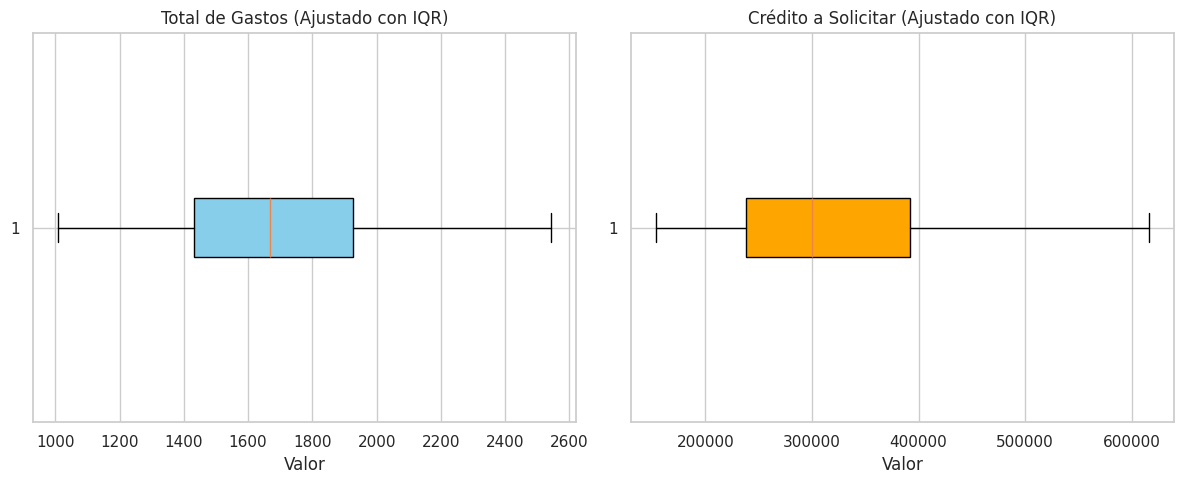

In [ ]:
# MANEJO DE VALORES ATÍPICOS (OUTLIERS) CON IQR

def ajustar_outliers_iqr(df, columna):

    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    print(f"\n Análisis de outliers para '{columna}':")
    print(f"Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
    print(f"Límite inferior = {limite_inferior:.2f}, Límite superior = {limite_superior:.2f}")

    outliers_inferiores = (df[columna] < limite_inferior).sum()
    outliers_superiores = (df[columna] > limite_superior).sum()

    print(f"Outliers inferiores: {outliers_inferiores}")
    print(f"Outliers superiores: {outliers_superiores}")

    # Ajustar los valores fuera del rango a los límites
    df[columna] = np.where(df[columna] < limite_inferior, limite_inferior, df[columna])
    df[columna] = np.where(df[columna] > limite_superior, limite_superior, df[columna])


# Aplicar la función a las dos variables clave
ajustar_outliers_iqr(df, "total_gastos")
ajustar_outliers_iqr(df, "credito_a_solicitar")

# Mostrar resumen estadístico después del ajuste
print("Resumen estadístico después del ajuste de outliers:\n")
display(df[["total_gastos", "credito_a_solicitar"]].describe())

# Visualización opcional: comparar antes y después
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].boxplot(df["total_gastos"], vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
axes[0].set_title("Total de Gastos (Ajustado con IQR)")
axes[0].set_xlabel("Valor")

axes[1].boxplot(df["credito_a_solicitar"], vert=False, patch_artist=True, boxprops=dict(facecolor="orange"))
axes[1].set_title("Crédito a Solicitar (Ajustado con IQR)")
axes[1].set_xlabel("Valor")

plt.tight_layout()
plt.show()

** Total de Gastos

La caja (rango intercuartílico) está concentrada entre valores aproximados de 1400 y 2000, lo que indica que la mayoría de los hogares tienen gastos totales dentro de este rango.

No se observan puntos fuera de los bigotes (límites superior e inferior), lo que significa que los valores atípicos fueron correctamente ajustados dentro del rango aceptable.

La mediana se ubica aproximadamente hacia el centro del rango, indicando una distribución equilibrada o ligeramente sesgada a la derecha, lo cual sugiere que algunos hogares podrían tener gastos un poco más elevados pero dentro del rango esperado.

** Crédito a Solicitar

La caja se extiende aproximadamente desde 200000 hasta 400000, lo que refleja la dispersión típica de los montos de crédito requeridos por los individuos del dataset.

La mediana se encuentra más cerca del límite inferior, lo que indica una ligera asimetría positiva (sesgo a la derecha), es decir, la mayoría de las personas solicitan créditos moderados y solo unos pocos necesitan montos significativamente más altos.

Al igual que con los gastos, ya no existen valores extremos visibles, lo que muestra que el procedimiento IQR estabilizó las distribuciones sin eliminar observaciones.

In [ ]:
columnas_categoricas = ['compro']

df_codificado = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

print("Nuevas columnas creadas:")
print([col for col in df_codificado.columns if col not in df.columns])

print("\nEstructura del DataFrame después de la codificación:")
print(df_codificado.info())

print("\nPrimeras filas del DataFrame transformado:")
display(df_codificado.head())

Nuevas columnas creadas:
['compro_1']

Estructura del DataFrame después de la codificación:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ingresos             202 non-null    int64  
 1   gasto_ppal           202 non-null    int64  
 2   gasto_vehiculo       202 non-null    int64  
 3   otros_gastos         202 non-null    int64  
 4   ahorros_en_banco     202 non-null    int64  
 5   valor_vivienda       202 non-null    int64  
 6   estado_civil         202 non-null    int64  
 7   hijos                202 non-null    int64  
 8   trabajo              202 non-null    int64  
 9   total_gastos         202 non-null    float64
 10  credito_a_solicitar  202 non-null    float64
 11  compro_1             202 non-null    bool   
dtypes: bool(1), float64(2), int64(9)
memory usage: 17.7 KB
None

Primeras filas del DataFrame transfor

,ingresos,gasto_ppal,gasto_vehiculo,otros_gastos,ahorros_en_banco,valor_vivienda,estado_civil,hijos,trabajo,total_gastos,credito_a_solicitar,compro_1
0,6000,1000,0,600,50000,400000,0,2,2,1600.0,348400.0,True
1,6745,944,123,429,43240,636897,1,3,6,1496.0,592161.0,False
2,6455,1033,98,795,57463,321779,2,1,8,1926.0,262390.0,True
3,7098,1278,15,254,54506,660933,0,0,3,1547.0,604880.0,False
4,6167,863,223,520,41512,348932,0,0,3,1606.0,305814.0,True


In [ ]:
# 1. Crear una copia del DataFrame para trabajar
df_var = df.copy()

# 2. Separar las variables predictoras (X) y la variable objetivo (y)
# Suponemos que 'compro' es la variable objetivo
X = df_var.drop('compro', axis=1)
y = df_var['compro']

# 3. Aplicar el filtro de varianza
# Umbral de varianza: 0.01 (puedes ajustar según necesidad)
selector = VarianceThreshold(threshold=0.01)
X_filtrado = selector.fit_transform(X)

# 4. Obtener las columnas que se conservaron
columnas_seleccionadas = X.columns[selector.get_support()]

# 5. Crear un nuevo DataFrame con las columnas seleccionadas
df_filtrado = pd.DataFrame(X_filtrado, columns=columnas_seleccionadas)
df_filtrado["compro"] = y  # Volvemos a incluir la variable objetivo

# 6. Mostrar resultados
print("Columnas eliminadas por baja varianza:")
print(list(set(X.columns) - set(columnas_seleccionadas)))

print("\nColumnas restantes tras el filtrado:")
print(list(df_filtrado.columns))

print("\nEstructura del nuevo DataFrame:")
df_filtrado.info()

# Vista previa de los datos
display(df_filtrado.head())

Columnas eliminadas por baja varianza:
[]

Columnas restantes tras el filtrado:
['ingresos', 'gasto_ppal', 'gasto_vehiculo', 'otros_gastos', 'ahorros_en_banco', 'valor_vivienda', 'estado_civil', 'hijos', 'trabajo', 'total_gastos', 'credito_a_solicitar', 'compro']

Estructura del nuevo DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ingresos             202 non-null    float64
 1   gasto_ppal           202 non-null    float64
 2   gasto_vehiculo       202 non-null    float64
 3   otros_gastos         202 non-null    float64
 4   ahorros_en_banco     202 non-null    float64
 5   valor_vivienda       202 non-null    float64
 6   estado_civil         202 non-null    float64
 7   hijos                202 non-null    float64
 8   trabajo              202 non-null    float64
 9   total_gastos         202 non-null    float6

,ingresos,gasto_ppal,gasto_vehiculo,otros_gastos,ahorros_en_banco,valor_vivienda,estado_civil,hijos,trabajo,total_gastos,credito_a_solicitar,compro
0,6000.0,1000.0,0.0,600.0,50000.0,400000.0,0.0,2.0,2.0,1600.0,348400.0,1
1,6745.0,944.0,123.0,429.0,43240.0,636897.0,1.0,3.0,6.0,1496.0,592161.0,0
2,6455.0,1033.0,98.0,795.0,57463.0,321779.0,2.0,1.0,8.0,1926.0,262390.0,1
3,7098.0,1278.0,15.0,254.0,54506.0,660933.0,0.0,0.0,3.0,1547.0,604880.0,0
4,6167.0,863.0,223.0,520.0,41512.0,348932.0,0.0,0.0,3.0,1606.0,305814.0,1


** Observaciones:
Cada variable presenta valores distintos entre las 202 datos.

Esto sugiere que el dataset está bien balanceado en cuanto a variabilidad y que cada característica podría aportar información útil al modelo.

In [ ]:
# 2️⃣ Separar variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=["total_gastos", "credito_a_solicitar"])
y = df["compro"]

# 3️⃣ Dividir en conjuntos de entrenamiento y prueba (80%-20%)
# stratify=y garantiza que la proporción de clases (0 y 1) se mantenga igual en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verificar distribución de clases antes de aplicar SMOTE
print("Distribución original en el conjunto de entrenamiento:")
print(y_train.value_counts(normalize=True))

# 4️⃣ Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 5️⃣ Verificar distribución después de aplicar SMOTE
print("\nDistribución después de aplicar SMOTE:")
print(y_train_res.value_counts(normalize=True))

# 6️⃣ Mostrar dimensiones finales de los conjuntos
print(f"\nTamaño del conjunto de entrenamiento original: {X_train.shape}")
print(f"Tamaño del conjunto de entrenamiento balanceado: {X_train_res.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Distribución original en el conjunto de entrenamiento:
compro
0    0.670807
1    0.329193
Name: proportion, dtype: float64

Distribución después de aplicar SMOTE:
compro
1    0.5
0    0.5
Name: proportion, dtype: float64

Tamaño del conjunto de entrenamiento original: (161, 10)
Tamaño del conjunto de entrenamiento balanceado: (216, 10)
Tamaño del conjunto de prueba: (41, 10)


** Conclusiones generales

SMOTE balanceó exitosamente el conjunto de entrenamiento, evitando el sesgo hacia la clase mayoritaria, ya que la distribución original de 67% sin comprar vivienda (clase 0) y el 33% si la compararon (clase 1) presenta un desbalance y puede causar que el modelo aprenda a predecir siempre la clase mayoritaria, ignorando la minoritaria.

El conjunto de prueba mantiene la distribución original, ideal para evaluar el rendimiento del modelo en condiciones reales.

El dataset está ahora listo para el modelado supervisado, por ejemplo: Regresión logística, Árbol de decisión, Random Forest, XGBoost, entre otros.

Con este equilibrio, el modelo podrá aprender mejor los patrones que diferencian a quienes compran o no una vivienda, mejorando la precisión en ambas clases.